In [21]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
from matplotlib import pyplot as plt

%matplotlib inline

In [48]:
reload(test_data)
reload(dual_certificates)

N = 10
m = 4
fc = 30
min_separation = 0.033

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.jittered_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_multidim(N, m)

interpolator_1 = dual_certificates.interpolate_multidim(support, sign_pattern, kernel)
interpolator_2 = dual_certificates.interpolate_multidim_wDer(support, sign_pattern, kernel)

(10,)


In [49]:
print support[0] - support[-1] + 1.0

0.668906476066


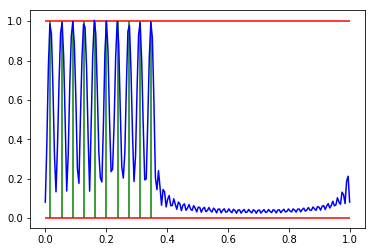

In [50]:
reload(plt_util)
plt_util.plot_trig_poly_magnitude(interpolator_1)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

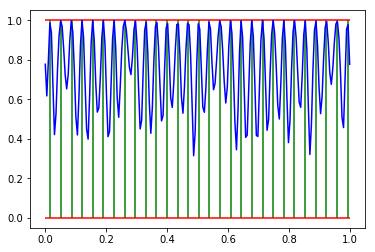

In [38]:
plt_util.plot_trig_poly_magnitude(interpolator_2)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [116]:
dual_certificates.validate(support, sign_pattern, interpolator_1)

{'bound_achieved': False, 'status': False, 'values_achieved': True}

In [117]:
dual_certificates.validate(support, sign_pattern, interpolator_2)

{'bound_achieved': True, 'status': True, 'values_achieved': True}

# Phase Transition

In [12]:
import phase_transition
from matplotlib import pyplot as plt

In [ ]:
%%time

reload(phase_transition)
reload(test_data)
reload(dual_certificates)

fc = 30
m = 1

sizes = range(2, 30)
min_separations = np.linspace(0.05, 1.0, 30) / float(fc)

probs = phase_transition.grid_probabilities(
    test_data.jittered_supports,
    lambda size: test_data.uniform_sign_pattern_multidim(size, m),
    trig_poly.TrigPoly.dirichlet(fc),
    dual_certificates.interpolate_multidim_wDer,
    sizes,
    min_separations,
    num_experiments=10,
    verbose=True)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
7 0
7 1
7 2
7 3
7 4


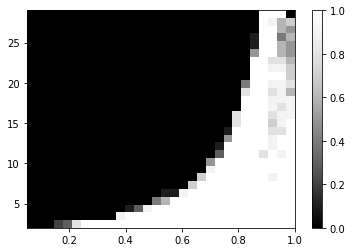

In [32]:
plt.imshow(
    np.flip(probs, axis=0), 
    cmap='Greys_r', 
    vmin=0.0, 
    vmax=1.0,
    extent=[min_separations.min() * fc, min_separations.max() * fc, sizes[0], sizes[-1]], 
    aspect='auto')
plt.colorbar()

# Timing

In [4]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition

%matplotlib inline

In [5]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [16]:
reload(phase_transition)
reload(test_data)
reload(dual_certificates)

fc = 30
m = 4

sizes = np.array([5])
min_separations = np.array([0.5]) / float(fc)

# dual_certificates.interpolate_multidim_wDer
# trig_poly.TrigPoly.__add__

%lprun -f trig_poly.TrigPoly.eval phase_transition.grid_probabilities(test_data.jittered_supports,lambda size: test_data.uniform_sign_pattern_multidim(size, m),trig_poly.TrigPoly.dirichlet(fc),dual_certificates.interpolate_multidim_wDer,sizes,min_separations,num_experiments=10,verbose=True)

0 0
